<a href="https://colab.research.google.com/github/IT24100637/2025-Y2-S1-MLB-B4G2-02--AIML---Data-Preprocessing-and-EDA-Pipeline/blob/main/NoteBooks/IT24100654_OutliersRemoving_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving IT24100658_TargetEncoding.csv to IT24100658_TargetEncoding.csv


In [2]:
df = pd.read_csv("IT24100658_TargetEncoding.csv")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math


def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

df_clean = df.copy()

for col in ['Area', 'Bathroom', 'Parking', 'Price', 'Per_Sqft']:
    if col in df_clean.columns:
        df_clean = remove_outliers_iqr(df_clean, col)

df_clean = df_clean.reset_index(drop=True)

print("After removing outliers:", df_clean.shape)

df_clean.to_csv("IT24100654_OutliersRemoving.csv", index=False)
print("Outliers removed for selected numeric columns. Saved as IT24100654_OutliersRemoving.csv")



After removing outliers: (951, 11)
Outliers removed for selected numeric columns. Saved as IT24100654_OutliersRemoving.csv


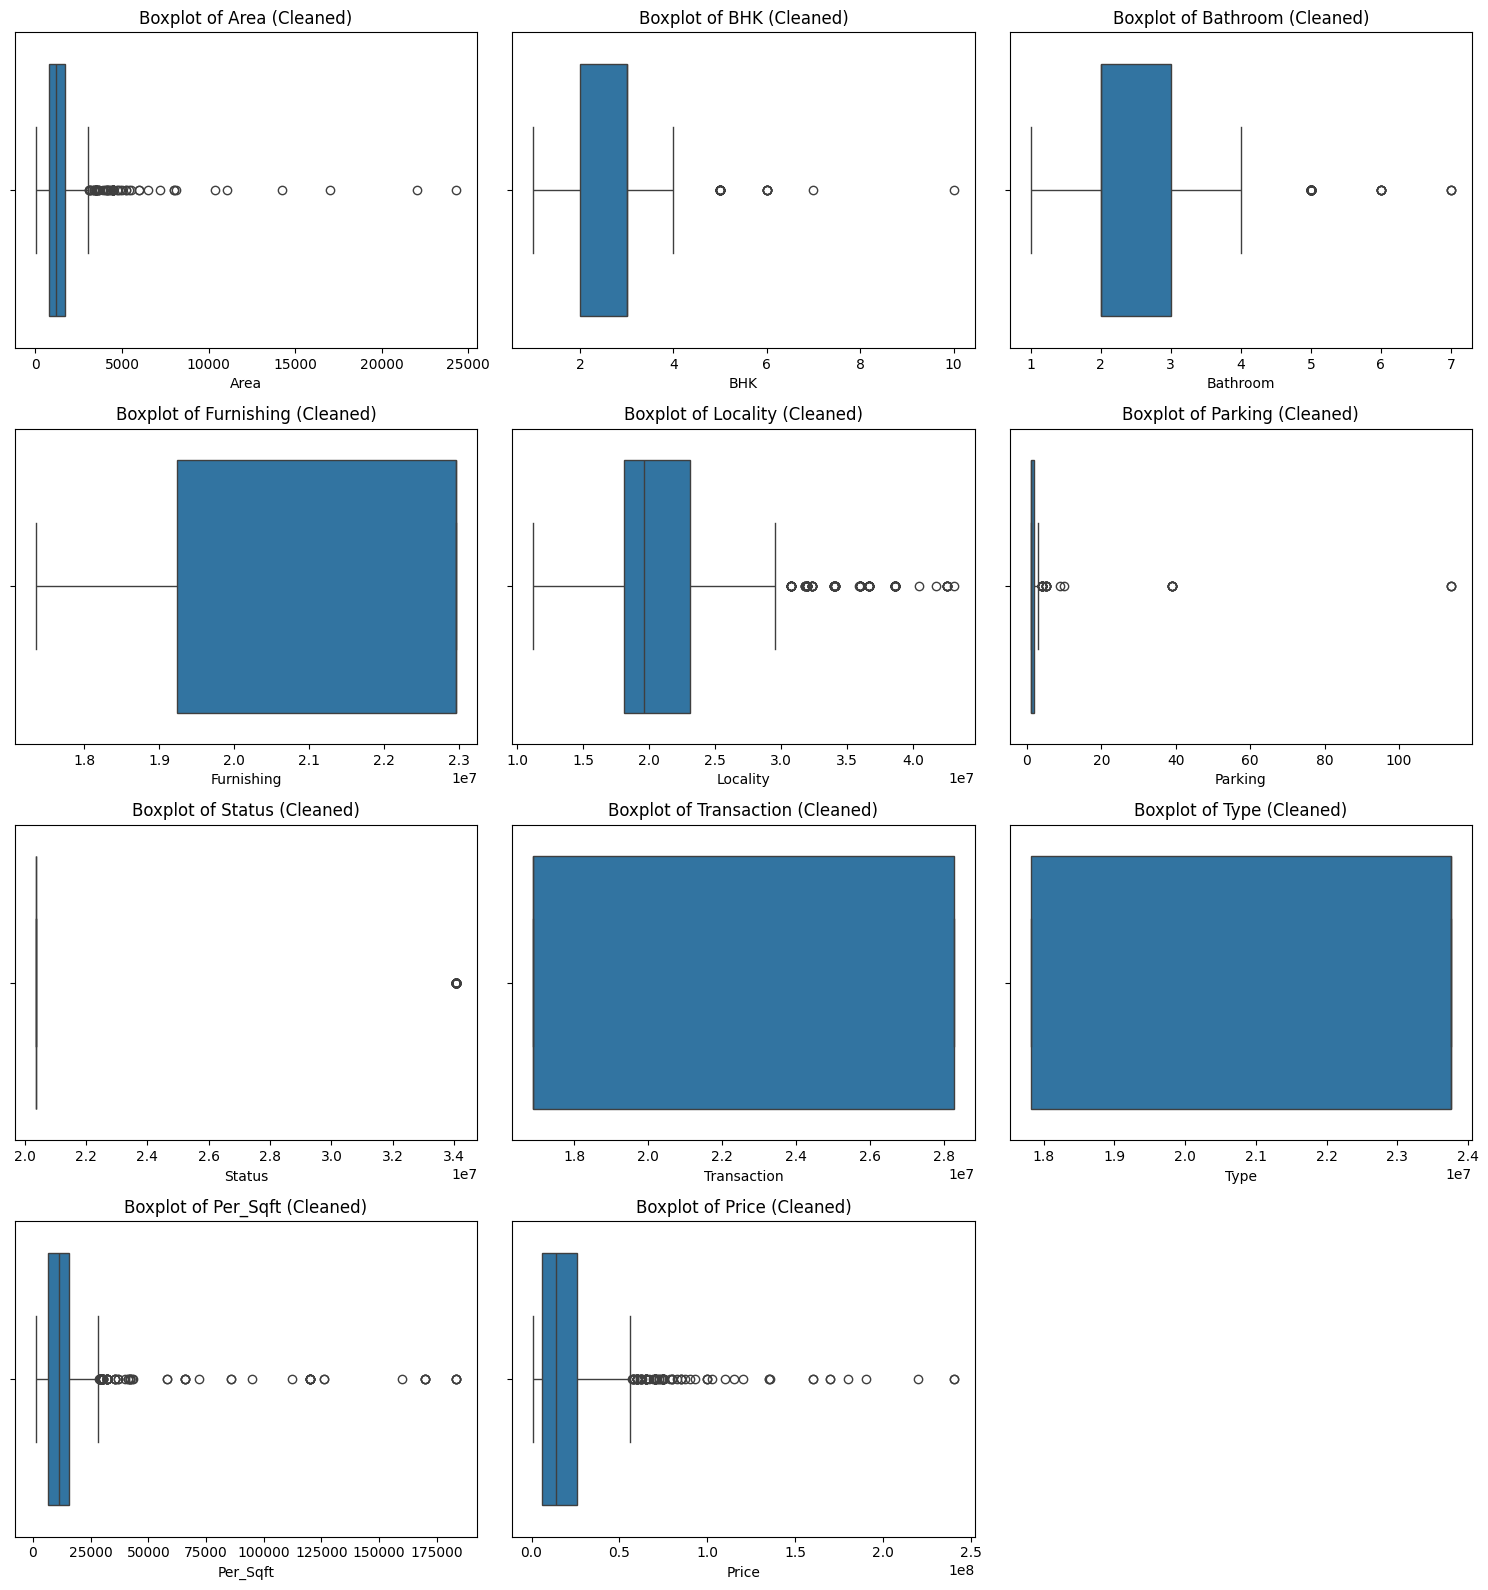

In [6]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
n = len(num_cols)

rows = math.ceil(n / 3)
cols = 3

plt.figure(figsize=(5*cols, 4*rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col} (Cleaned)")

plt.tight_layout()
plt.show()


In [7]:
from google.colab import files
files.download("/content/IT24100654_OutliersRemoving.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>